# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Descriptive statistics
### VIDEO: Data from different distributions
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats  # or: from scipy import stats
import numpy as np

rng = np.random.default_rng()

In [2]:
## Gaussian

N = 1001  # number of discretizations
x = np.linspace(-4, 4, N)
gausdist = stats.norm.pdf(x)  # probability density function
print(len(np.diff(x)), len(gausdist))

1000 1001


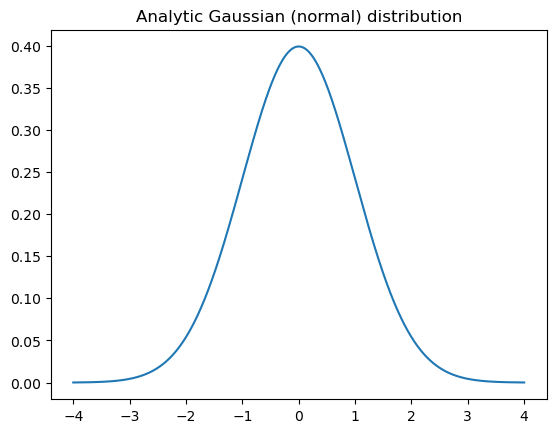

The sum of all values in this distribution is 124.99221530601619
Calculating the Riman sum of the distribution...
= 0.9999377224481296


In [3]:
plt.plot(x, gausdist)
plt.title("Analytic Gaussian (normal) distribution")
plt.show()

# is this a probability distribution?
print(f"The sum of all values in this distribution is {np.sum(gausdist)}")
# try scaling by dx...
print("Calculating the Riman sum of the distribution...")
print(f"= {np.sum(gausdist*np.mean(np.diff(x)))}")

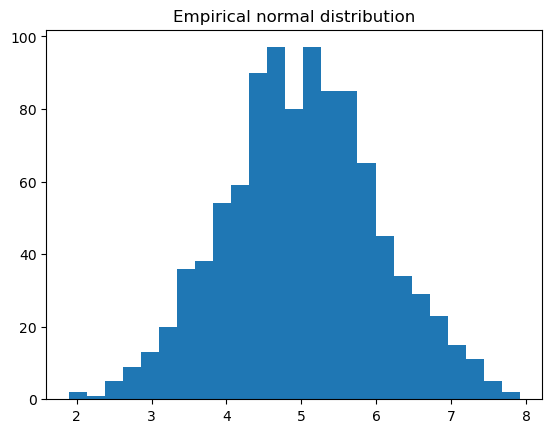

In [5]:
## Normally-distributed random numbers

# parameters
stretch = 1  # variance (square of standard deviation)
shift = 5  # mean
n = 1000

# create data
data = stretch * rng.standard_normal(n) + shift

# plot data
plt.hist(data, 25)
plt.title("Empirical normal distribution")
plt.show()

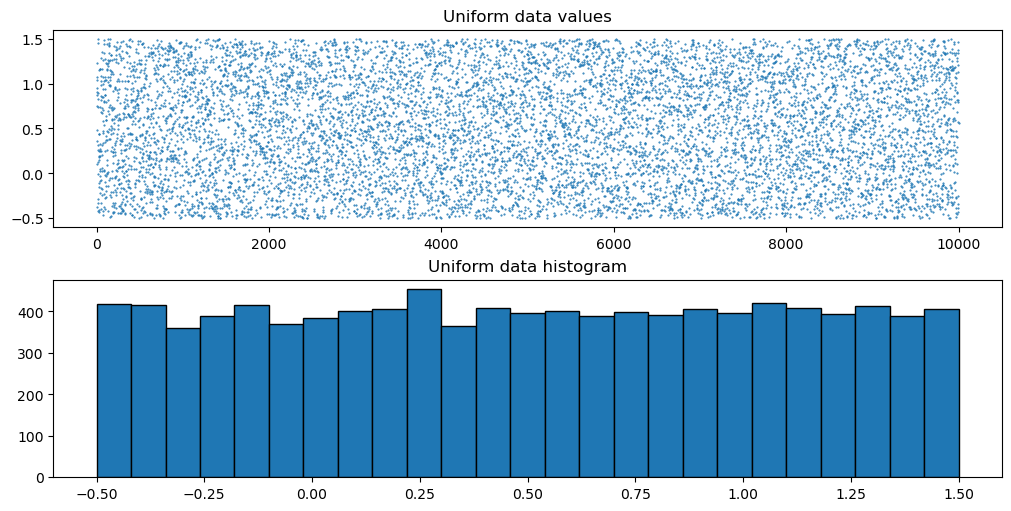

In [8]:
## Uniformly-distributed numbers

# parameters
stretch = 2  # not the variance
shift = -0.5
n = 10000

# create data
data = stretch * rng.uniform(size=n) + shift  # - stretch / 2
# первый член создает равномерно распределенные числа от 0 до 2
# второй член смещает эти числа в интервал от -0.5 до 1.5

# plot data
fig, ax = plt.subplots(2, 1, figsize=(10, 5), constrained_layout=True)
# fig.subplots_adjust(hspace=0.2)

ax[0].plot(data, ".", markersize=1)
ax[0].set_title("Uniform data values")

ax[1].hist(data, 25, edgecolor="black", linewidth=1)
ax[1].set_title("Uniform data histogram")

plt.show()

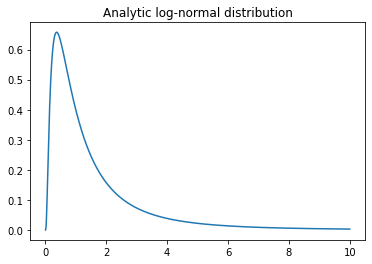

In [5]:
## log-normal distribution

N = 1001
x = np.linspace(0, 10, N)
lognormdist = stats.lognorm.pdf(x, 1)

plt.plot(x, lognormdist)
plt.title("Analytic log-normal distribution")
plt.show()

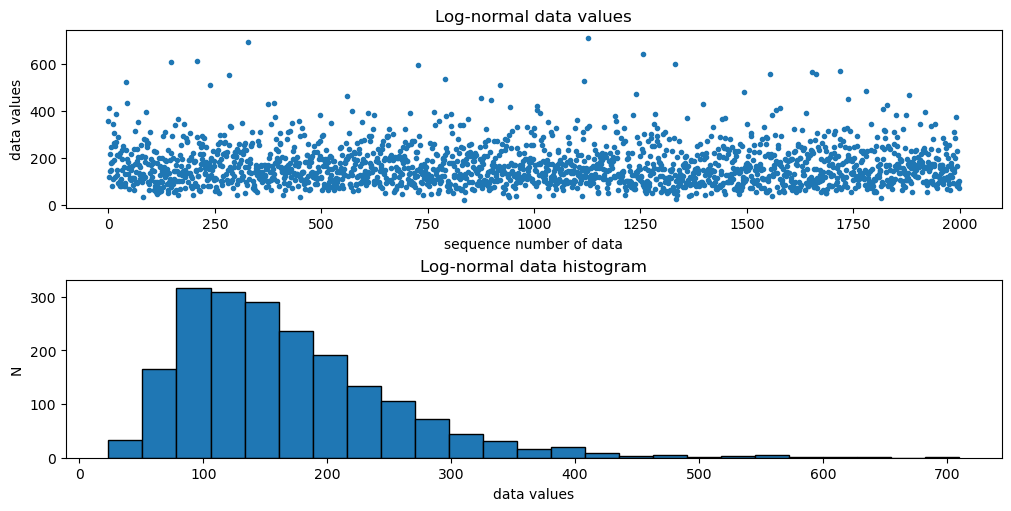

In [9]:
## empirical log-normal distribution

shift = 5  # equal to the mean?
stretch = 0.5  # equal to standard deviation?
n = 2000  # number of data points

# generate data
data = stretch * rng.standard_normal(n) + shift
data = np.exp(data)

# plot data
fig, ax = plt.subplots(2, 1, figsize=(10, 5), constrained_layout=True)
# fig.subplots_adjust(hspace=0.2)

ax[0].plot(data, ".")
ax[0].set(
    title="Log-normal data values",
    xlabel="sequence number of data",
    ylabel="data values"
)

ax[1].hist(data, 25, edgecolor='black', linewidth=1)
ax[1].set(title="Log-normal data histogram", xlabel="data values", ylabel="N")
plt.show()

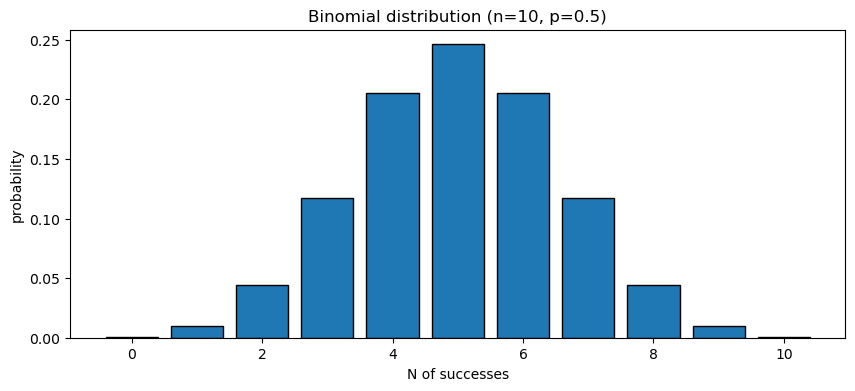

In [11]:
## binomial

# a binomial distribution is the probability of K heads in N coin tosses,
# given a probability of p heads (e.g., .5 is a fair coin).

n = 10  # number on coin tosses
p = 0.5  # probability of heads
x = range(n + 1)  # desired number of heads

bindist = stats.binom.pmf(x, n, p)  # probability mass function

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(x, bindist, edgecolor='k', linewidth=1)
ax.set(title="Binomial distribution (n=%s, p=%g)" %(n, p),
       xlabel='N of successes', ylabel='probability')
plt.show()

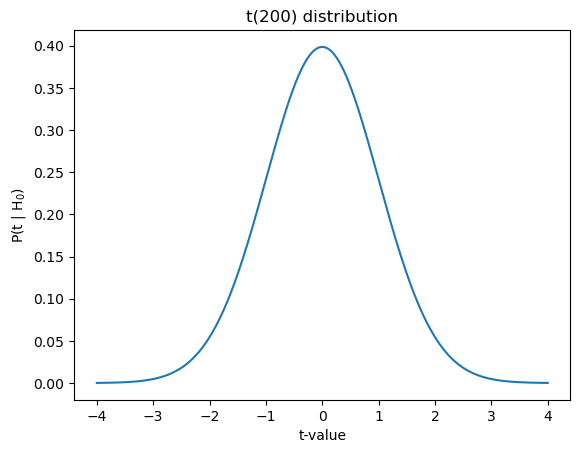

In [12]:
## t (aka Student's distribution)

# parameters
x = np.linspace(-4, 4, 1001) # values to evaluate
df = 200  # degrees of freedom

t = stats.t.pdf(x, df)

plt.plot(x, t)
plt.xlabel("t-value")
plt.ylabel("P(t | H$_0$)")
plt.title(f"t({df}) distribution")
plt.show()

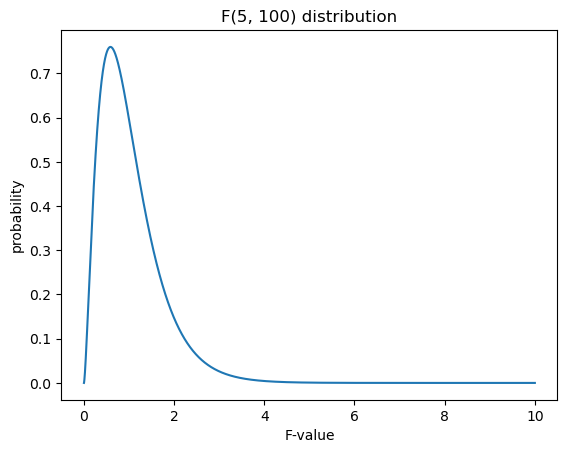

In [18]:
## F (aka Fisher's distribution)

# parameters
num_df = 5  # numerator degrees of freedom
den_df = 100  # denominator df

# values to evaluate
x = np.linspace(0, 10, 10001)

# the distribution
fdist = stats.f.pdf(x, num_df, den_df)

plt.plot(x, fdist)
plt.title("F({}, {}) distribution".format(num_df, den_df))
plt.xlabel("F-value")
plt.ylabel('probability')
plt.show()